## Initial PATH

In [1]:
import os
ROOT_PATH = os.path.abspath("../..") # "/home/jovyan/ChestXray-14" on developer team machine
INPUT_PATH = f"{ROOT_PATH}/dataset/ChestXray NIH"
INPUT_PATH = os.path.abspath(INPUT_PATH)

BATCH_SIZE = 128
IMG_SIZE = 224
SEED = 42

In [2]:
INPUT_PATH

'/home/jovyan/ChestXray-14/dataset/ChestXray NIH'

In [3]:
EXPERIMENT_NAME = "under_sampling_5_folds_dataset_train_valid_test"
OUT_PATH = os.path.abspath(f"{INPUT_PATH}/data/{EXPERIMENT_NAME}")
OUT_PATH

'/home/jovyan/ChestXray-14/dataset/ChestXray NIH/data/under_sampling_5_folds_dataset_train_valid_test'

In [4]:
CURRENT_PATH = os.path.abspath("")
CURRENT_PATH

'/home/jovyan/ChestXray-14/experiments/Under_sampling-multilabel_classification'

## Load Full Dataset

In [5]:
import pandas as pd
DEFAULT_DISPLAY_ROWS = 6 # defualt is 10
pd.set_option('display.max_rows', DEFAULT_DISPLAY_ROWS)

In [6]:
FILE_PATH = f"{INPUT_PATH}/preprocessed_data.csv"

In [7]:
df = pd.read_csv(FILE_PATH, index_col=0)
df = df.reset_index()
df["index"] = df["index"].apply(
    lambda x: os.path.abspath(f"{ROOT_PATH}/{x}")
)
df = df.set_index("index")
df

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_000.png,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_001.png,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_002.png,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030803_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030804_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030805_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Preprocessing

In [8]:
import numpy as np
import sys
sys.path.append(ROOT_PATH)

In [9]:
from tqdm.notebook import tqdm
from modules.utils import serialize_fold

2023-04-09 13:20:25.922612: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [10]:
from sklearn.model_selection import train_test_split

df = df.astype("int16")
df_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)

In [11]:
import matplotlib.pyplot as plt
from IPython.display import display

def display_value_counts_each_label(msg, df_train):
    
    def create_df_count_clsss(df):
        count_class = {}
        for each_class in df.columns[:] :
            df_new = df[each_class].value_counts() 
            count_class[df_new.name] = [df_new[1]]

        df_count_class = pd.DataFrame(count_class).T
        df_count_class.set_axis(["Count"], axis="columns", inplace=True)
        
        return df_count_class
    
    df_count_class = create_df_count_clsss(df_train)

    print("======== " * 10)
    print(f"Message: {msg}")
    display(df_count_class.T)
    

In [12]:
display(df_train)

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00029763_001.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00020429_001.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_002/images/00003385_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00027679_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000211_014.png,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_003/images/00004169_002.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
display(df_test)

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_010/images/00022260_003.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00012048_007.png,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_007/images/00014352_005.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00013015_004.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00020945_013.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00028444_003.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
display_value_counts_each_label("df_train", df_train), display_value_counts_each_label("df_test", df_test);

======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: df_train


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,48201,9334,3773,15943,4256,1857,2029,1367,10692,1137,2722,2219,5046,4641,181


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: df_test


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,12160,2225,894,3951,1046,446,487,319,2625,294,663,557,1285,1141,46


## Under Sampling

In [15]:
def under_sampling_train_dataset(df_train):
    
    def create_df_count_class(df):
        count_class = {}
        for each_class in df.columns[:] :
            df_new = df[each_class].value_counts() 
            count_class[df_new.name] = [df_new[1]]

        df_count_class = pd.DataFrame(count_class).T
        df_count_class.set_axis(["Count"], axis="columns", inplace=True)
        
        return df_count_class
    
    df_count_class = create_df_count_class(df_train)
    
    number_of_no_finding_class = np.ceil(df_count_class.mean().values).astype('int16')[0]
    number_of_no_finding_class
    print("Number original - No Finding: ", df_count_class["Count"]["No Finding"])
    print("Number under sampling - No Finding: ", number_of_no_finding_class)
    
    df_without_no_finding = df_train.copy()
    no_finding_condition = df_train[df_train["No Finding"] == 1].index

    df_without_no_finding.drop(no_finding_condition, inplace=True)
    df_without_no_finding
    
    df_new_no_finding = df_train[df_train["No Finding"] == 1].copy()
    df_new_no_finding = df_new_no_finding.sample(n=number_of_no_finding_class, random_state=SEED)

    df_new_no_finding
    new_df_train = pd.concat([df_without_no_finding, df_new_no_finding])
    new_df_train = new_df_train.sample(frac=1, random_state=SEED).reset_index()
    new_df_train = new_df_train.set_index('index')
    new_df_train.to_csv(os.path.abspath(f"{CURRENT_PATH}/results/training_csv/{EXPERIMENT_NAME}_train_valid_test-df_train.csv"))

    new_df_train
    
    return new_df_train

In [16]:
df_train_under_sampling = under_sampling_train_dataset(df_train)
df_train_under_sampling

Number original - No Finding:  48201
Number under sampling - No Finding:  7560


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00001122_005.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_008/images/00017144_005.png,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030501_001.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00018484_002.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_010/images/00022459_000.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00013158_004.png,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [17]:
import matplotlib.pyplot as plt
from IPython.display import display

def plot_label_histogram(msg, df_train, df_train_under_sampling):
    
    def create_df_count_clsss(df):
        count_class = {}
        for each_class in df.columns[:] :
            df_new = df[each_class].value_counts() 
            count_class[df_new.name] = [df_new[1]]

        df_count_class = pd.DataFrame(count_class).T
        df_count_class.set_axis(["Count"], axis="columns", inplace=True)
        
        return df_count_class
    
    def plot_under_sampling(plot=True):
        fig, ax1 = plt.subplots(
            nrows=1, 
            ncols=1,
            constrained_layout = True,
            figsize=(12,6)
        )
        
        plt.title(f"Message: {msg}")
        X_LABELS = df_count_class.index
        X_axis = np.arange(len(df_count_class))
        ax1.set_xticks(X_axis, X_LABELS)
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

        ax1.bar(X_axis - 0.2, df_count_class["Count"], 0.4, label="Before Under Sampling")
        ax1.bar(X_axis + 0.2, df_count_class_new["Count"], 0.4, label="After Under Sampling")

        plt.legend()
        plt.savefig(f'{CURRENT_PATH}/results/images_train_valid/under_sampling_{msg}.png')
        if plot is True:
            plt.show()
        else:
            plt.show(block=False)
            plt.pause(3)
            plt.close()
    
    df_count_class = create_df_count_clsss(df_train)
    df_count_class_new = create_df_count_clsss(df_train_under_sampling)

    print("======== " * 10)
    print(f"Message: {msg}")
    display(df_count_class.T)
    display(df_count_class_new.T)
    
    print(f"""\
    Dataset Infomation:
        >> Train: {len(df_train) :,}
        >> Train Under Sampling: {len(df_train_under_sampling) :,}
        >> Test: {len(df_test) :,}
        >> Original Total: {len(df_train) + len(df_test) :,}
        >> Under sampling Total: {len(df_train_under_sampling) + len(df_test) :,}
    """)
    
    plot_under_sampling(plot=False);
    
    return df_count_class_new

======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: train_valid_test


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,48201,9334,3773,15943,4256,1857,2029,1367,10692,1137,2722,2219,5046,4641,181


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,7560,9334,3773,15943,4256,1857,2029,1367,10692,1137,2722,2219,5046,4641,181


    Dataset Infomation:
        >> Train: 89,696
        >> Train Under Sampling: 49,055
        >> Test: 22,424
        >> Original Total: 112,120
        >> Under sampling Total: 71,479
    


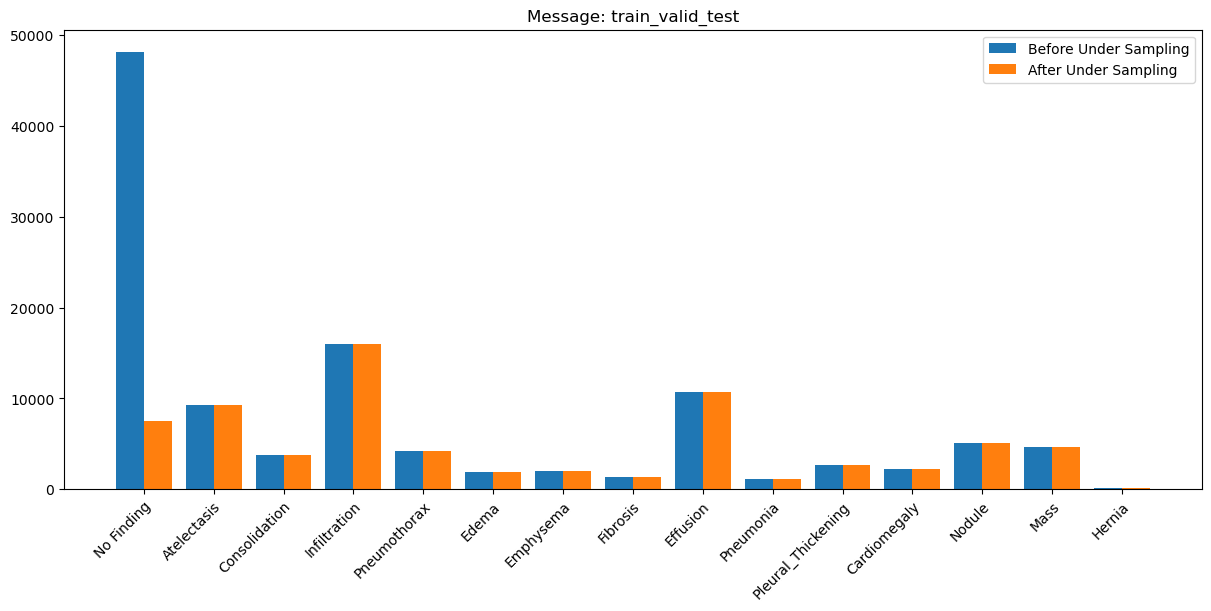

In [18]:
plot_label_histogram("train_valid_test", df_train, df_train_under_sampling);

## Split 5 Fold

In [19]:
from sklearn.utils import shuffle

df_train_5_fold = shuffle(df_train_under_sampling.copy(), random_state=SEED)
df1, df2, df3, df4, df5 = np.array_split(
    df_train_5_fold, 5
)

In [20]:
pd.concat([df1,df2,df3,df4,df5])

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00028211_002.png,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00028876_037.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00011752_015.png,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00013285_000.png,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00010729_004.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_007/images/00015540_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
(df_train_5_fold == pd.concat([df1,df2,df3,df4,df5])).all().all()

True

In [22]:
len(df1), len(df2), len(df3), len(df4), len(df5)

(9811, 9811, 9811, 9811, 9811)

## Write file as under_sampling_dataset

In [23]:
OUT_PATH

'/home/jovyan/ChestXray-14/dataset/ChestXray NIH/data/under_sampling_5_folds_dataset_train_valid_test'

In [24]:
class Directory:
    def create_folds_folder(self):
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold1", "train"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold1", "valid"), exist_ok=True)
        
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold2", "train"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold2", "valid"), exist_ok=True)
        
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold3", "train"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold3", "valid"), exist_ok=True)
        
        
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold4", "train"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold4", "valid"), exist_ok=True)
        
        
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold5", "train"), exist_ok=True)
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold5", "valid"), exist_ok=True)
        
        os.makedirs(os.path.join(INPUT_PATH, "data", EXPERIMENT_NAME, "folds", "fold5", "valid"), exist_ok=True)
        
        os.makedirs(f'{OUT_PATH}/test', exist_ok=True)
        
    def create_exp_train_csv_folder(self):
        os.makedirs(os.path.join(CURRENT_PATH, "results", "training_csv"), exist_ok=True)
        
    def create_image_under_sampling_folder(self):
        os.makedirs(os.path.join(CURRENT_PATH, "results", "images_train_valid"), exist_ok=True)
        
NUM_TO_SPLIT_FILES = 100
Directory().create_folds_folder()
Directory().create_exp_train_csv_folder()
Directory().create_image_under_sampling_folder()

In [25]:
NUM_TO_SPLIT_FILES = 100

In [34]:
# 5 Fold
for (fold_num, (df_train, df_valid)) in enumerate([
    (pd.concat([df2, df3, df4, df5]), df1),
    (pd.concat([df1, df3, df4, df5]), df2),
    (pd.concat([df1, df2, df4, df5]), df3),
    (pd.concat([df1, df2, df3, df5]), df4),
    (pd.concat([df1, df2, df3, df4]), df5)
        ]):
    
    print(">> FOLD:", fold_num)
    display_value_counts_each_label("DF Value", df_train)
    display_value_counts_each_label("DF Value", df_valid)
    
    print("Is NA")
    display(pd.DataFrame(df_train.isna().sum()).T)
    display(pd.DataFrame(df_valid.isna().sum()).T)
#     for i, data in tqdm(
#         enumerate(np.array_split(df_train, NUM_TO_SPLIT_FILES)),
#         total=NUM_TO_SPLIT_FILES
#     ):
#         serialize_fold(
#             data, 
#             name=f'{OUT_PATH}/folds/fold{fold_num + 1}/train/{i:03d}-{len(data):03d}'
#         )
    
#     # Valid
#     for i, data in tqdm(
#         enumerate(np.array_split(df_valid, NUM_TO_SPLIT_FILES)),
#         total=NUM_TO_SPLIT_FILES
#     ):
#         serialize_fold(
#             data, 
#             name=f'{OUT_PATH}/folds/fold{fold_num + 1}/valid/{i:03d}-{len(data):03d}'
#         )

>> FOLD: 0
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,6057,7541,2994,12735,3407,1471,1607,1099,8531,909,2190,1789,4053,3750,139


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,1503,1793,779,3208,849,386,422,268,2161,228,532,430,993,891,42


Is NA


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


>> FOLD: 1
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,6028,7434,3050,12813,3410,1493,1623,1100,8499,915,2148,1763,4036,3704,143


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,1532,1900,723,3130,846,364,406,267,2193,222,574,456,1010,937,38


Is NA


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


>> FOLD: 2
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,6053,7455,3005,12679,3369,1500,1620,1114,8635,904,2189,1802,3982,3735,150


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,1507,1879,768,3264,887,357,409,253,2057,233,533,417,1064,906,31


Is NA


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


>> FOLD: 3
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,6063,7476,2996,12793,3409,1491,1626,1087,8543,917,2161,1769,4068,3678,142


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,1497,1858,777,3150,847,366,403,280,2149,220,561,450,978,963,39


Is NA


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


>> FOLD: 4
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,6039,7430,3047,12752,3429,1473,1640,1068,8560,903,2200,1753,4045,3697,150


======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
Message: DF Value


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
Count,1521,1904,726,3191,827,384,389,299,2132,234,522,466,1001,944,31


Is NA


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
pd.DataFrame(df_train.isna().sum()).T

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
